In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Data Prepocessing, Normalize, Dimension Reduction

In [2]:
adata = sc.read_mtx("GSE149689/matrix.mtx")
adata

AnnData object with n_obs × n_vars = 33538 × 85144

In [3]:
adata = adata.T
adata

AnnData object with n_obs × n_vars = 85144 × 33538

In [4]:
gene = pd.read_table("GSE149689/features.tsv", header = None)
gene

,0,1,2
0,ENSG00000243485,MIR1302-2HG,Gene Expression
1,ENSG00000237613,FAM138A,Gene Expression
2,ENSG00000186092,OR4F5,Gene Expression
3,ENSG00000238009,AL627309.1,Gene Expression
4,ENSG00000239945,AL627309.3,Gene Expression
...,...,...,...
33533,ENSG00000277856,AC233755.2,Gene Expression
33534,ENSG00000275063,AC233755.1,Gene Expression
33535,ENSG00000271254,AC240274.1,Gene Expression
33536,ENSG00000277475,AC213203.1,Gene Expression


In [5]:
gene = np.array(gene[1])
len(gene)

33538

In [6]:
barcode = pd.read_table("GSE149689/barcodes.tsv", header = None)
barcode

,0
0,AAACCCAAGGGCAATC-1
1,AAACCCAAGGTGCCAA-1
2,AAACCCACAAGAATGT-1
3,AAACCCACAGCTGAAG-1
4,AAACCCACATATCGGT-1
...,...
85139,TTTGTTGAGTACTGGG-20
85140,TTTGTTGAGTGCACAG-20
85141,TTTGTTGCATCATTTC-20
85142,TTTGTTGGTACCTTCC-20


In [7]:
barcode = np.array(barcode[0])
len(barcode)

85144

In [8]:
adata.obs_names = barcode
adata.var_names = gene
adata

AnnData object with n_obs × n_vars = 85144 × 33538

In [9]:
adata.var_names_make_unique()
adata.obs

""
AAACCCAAGGGCAATC-1
AAACCCAAGGTGCCAA-1
AAACCCACAAGAATGT-1
AAACCCACAGCTGAAG-1
AAACCCACATATCGGT-1
...
TTTGTTGAGTACTGGG-20
TTTGTTGAGTGCACAG-20
TTTGTTGCATCATTTC-20
TTTGTTGGTACCTTCC-20


In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 76529 × 23311
    obs: 'n_genes'
    var: 'n_cells'

In [11]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

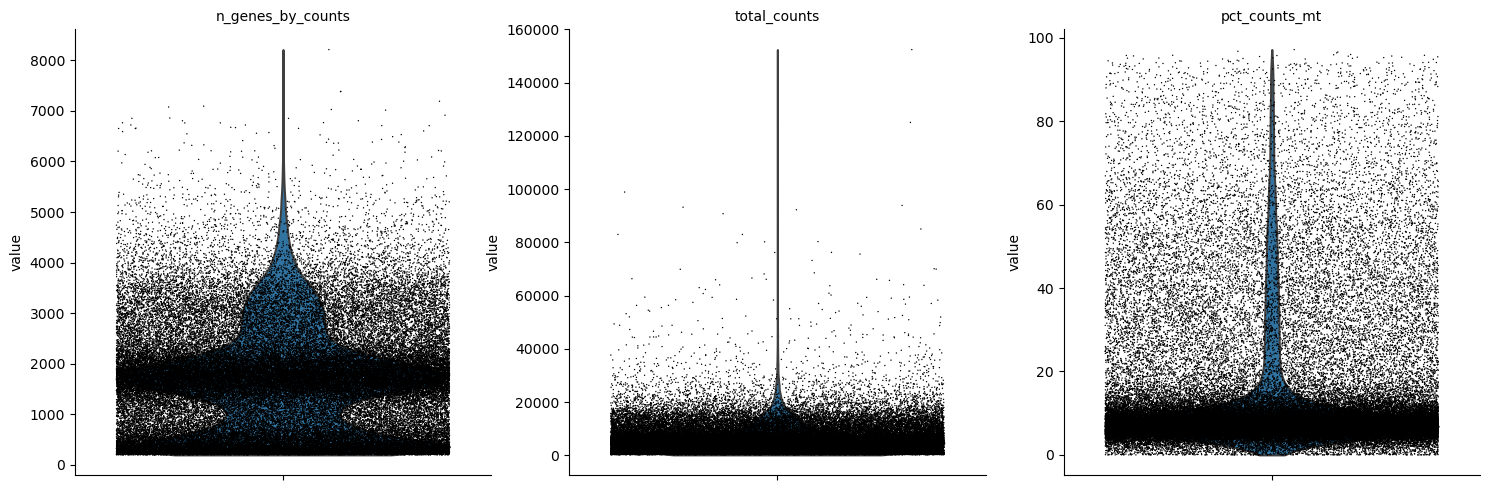

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

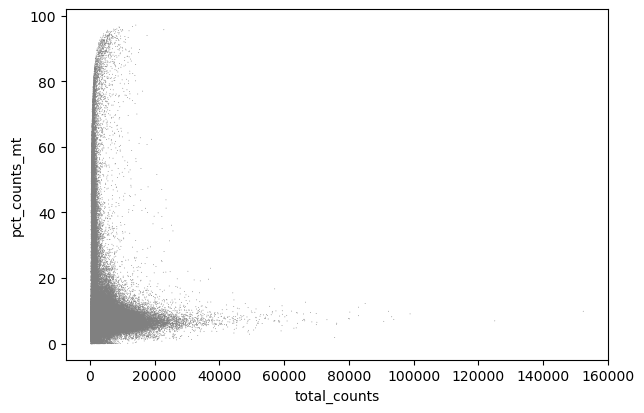

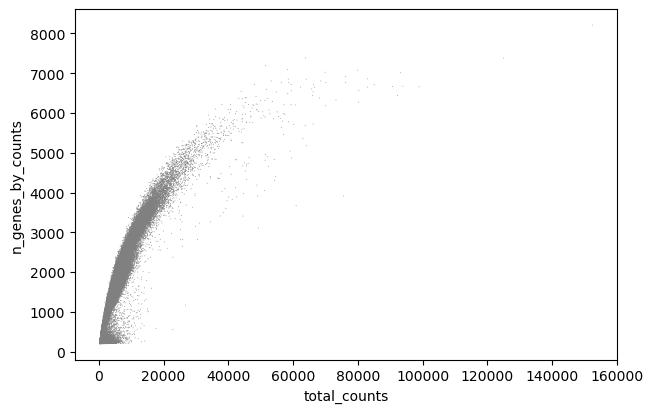

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [14]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
adata

View of AnnData object with n_obs × n_vars = 62246 × 23311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [15]:
# barcode
# unfilter data
pre = adata.obs_names

# extract Healthy Donor from barcode
# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
pattern = r"-(5|13|14|19)$"
pre_healthy = pre[pre.str.contains(pattern)]


pre_healthy

C:\Users\User\AppData\Local\Temp\ipykernel_24236\3023024676.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  pre_healthy = pre[pre.str.contains(pattern)]


Index(['AAACCCAAGTGTAGAT-5', 'AAACCCACACAATGCT-5', 'AAACCCACATACTGAC-5',
       'AAACCCACATGAGATA-5', 'AAACCCAGTTTCGTGA-5', 'AAACCCATCGGTAAGG-5',
       'AAACGAAGTAGCGCTC-5', 'AAACGAAGTAGGTAGC-5', 'AAACGAAGTCAAATCC-5',
       'AAACGAAGTCGCATGC-5',
       ...
       'TTTGGAGTCTTGCAGA-19', 'TTTGGTTCATGGATCT-19', 'TTTGGTTTCATGACAC-19',
       'TTTGGTTTCCGCACTT-19', 'TTTGTTGAGAGGCGTT-19', 'TTTGTTGAGGCTTTCA-19',
       'TTTGTTGCAACAAGAT-19', 'TTTGTTGCAATCTGCA-19', 'TTTGTTGTCCTGTAAG-19',
       'TTTGTTGTCTGGGATT-19'],
      dtype='object', length=18327)

In [16]:
healthy = adata[adata.obs.index.isin(pre_healthy)]
healthy.X

<18327x23311 sparse matrix of type '<class 'numpy.float32'>'
	with 37044787 stored elements in Compressed Sparse Row format>

In [17]:
sc.pp.normalize_total(healthy, target_sum=1e4)

D:\Python(Anaconda)\Anaconda python\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.pp.log1p(healthy)
healthy.raw = healthy
healthy

AnnData object with n_obs × n_vars = 18327 × 23311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [19]:
# linear regression out unwanted sources of variation
sc.pp.regress_out(healthy, ['total_counts', 'pct_counts_mt'])

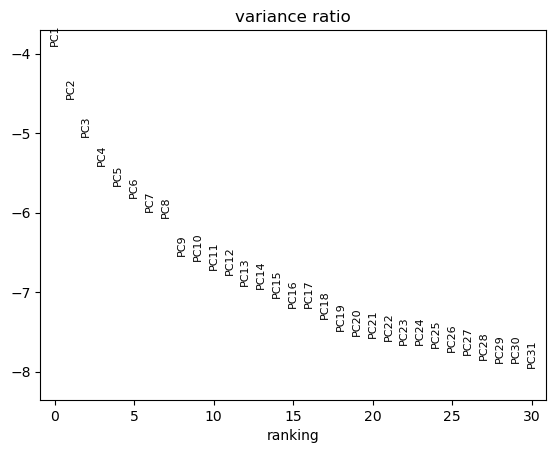

In [20]:
sc.pp.scale(healthy, max_value=10)
sc.tl.pca(healthy, svd_solver='arpack')
sc.pl.pca_variance_ratio(healthy, log=True)

In [21]:
sc.pp.neighbors(healthy, n_neighbors=10, n_pcs=40)
sc.tl.leiden(healthy)

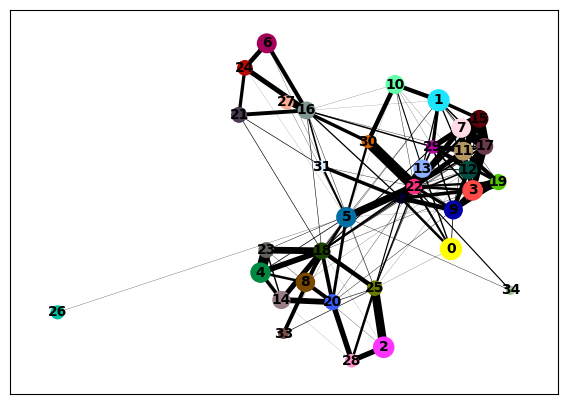

In [22]:
# default use leiden透過leiden去計算那個gene expression的部分去挑出最後的權重
#再多維的空間做hireachecal(階層的)挑選，clustering會越來越少，直到hirachical跟cluster一樣才會結束

sc.tl.paga(healthy)
sc.pl.paga(healthy)

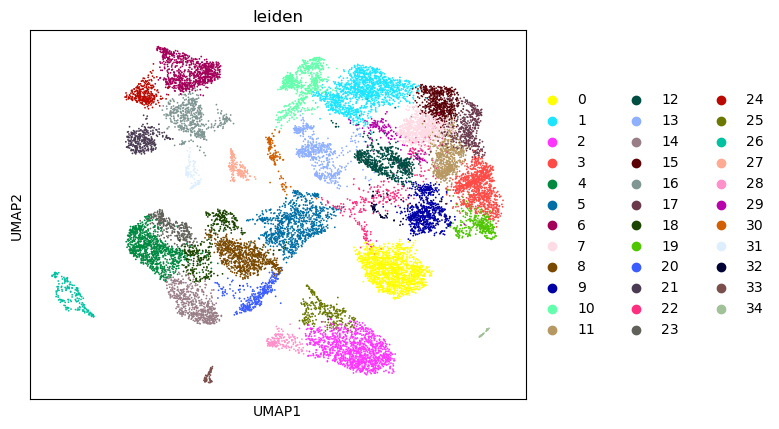

In [23]:
sc.tl.umap(healthy, init_pos='paga')
sc.pl.umap(healthy, color = "leiden")

In [24]:
healthy.write_h5ad("benson_pbmc_healthy_donor.h5ad")

In [ ]:
sc.pl.umap(healthy, color = "leiden")

In [25]:
healthy

AnnData object with n_obs × n_vars = 18327 × 23311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'